In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from qetpy.utils import lowpassfilter 
from qetpy import autocuts
import cdms
#from CDMSDataCatalog import CDMSDataCatalog
import scipy.optimize as optimize
import matplotlib as mpl
import pickle as pkl
import os, sys
import ROOT as rt
import seaborn as sns
import operator as op

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 96 from PyObject
/usr/local/lib/python3.8/dist-packages/awkward0/__init__.py:8: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if distutils.version.LooseVersion(numpy.__version__) < distutils.version.LooseVersion("1.13.1"):


Welcome to JupyROOT 6.24/06


In [2]:
base = '/data/chocula/pandey/data_processing/rq'


series = ['07240205_1718','07240206_1832']
#series = ['07240205_1718']
filePath = []

for ser in series:
    
    fp = '%s/%s/umn_%s.root'%(base,ser,ser)
    if(os.path.exists(fp)):
        print(ser,' : ',fp)
        filePath.append(fp)
    else:
        print('not found: ',fp)



07240205_1718  :  /data/chocula/pandey/data_processing/rq/07240205_1718/umn_07240205_1718.root
07240206_1832  :  /data/chocula/pandey/data_processing/rq/07240206_1832/umn_07240206_1832.root


In [3]:
#dets = ['Z1','Z4']
dets = ['Z1']
zips = {
    'Z1' : 'zip1',
    'Z2' : 'zip2',
    'Z3' : 'zip3',
    'Z4' : 'zip4',
    'Z5' : 'zip5',
    'Z6' : 'zip6'
}
RQ = []

for idx,key in enumerate(series):
    t = {}
    for i,det in enumerate(dets):
        t[det] = uproot.open(filePath[idx])['rqDir/%s'%(zips[det])]
    RQ.append(t)

eventTree=[]
for idx,key in enumerate(series):
    eventTree.append(uproot.open(filePath[idx])['rqDir/eventTree']) 

print('Done!')

Done!


In [8]:
#uproot.open(filePath[0])['rqDir/eventTree']
eventTree[0].show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
EventCategory        | double                   | AsDtype('>f8')
EventNumber          | double                   | AsDtype('>f8')
EventTime            | double                   | AsDtype('>f8')
EventType            | double                   | AsDtype('>f8')
GPS_d                | double                   | AsDtype('>f8')
GPS_h                | double                   | AsDtype('>f8')
GPS_m                | double                   | AsDtype('>f8')
GPS_s                | double                   | AsDtype('>f8')
GPS_status           | double                   | AsDtype('>f8')
GPS_ticks            | double                   | AsDtype('>f8')
GPS_y                | double                   | AsDtype('>f8')
LiveTime             | double                   | AsDtype('>f8')
SeriesNumber         | double                   | AsDtype(

In [14]:
RQ[0]['Z1'].show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
DetType              | double                   | AsDtype('>f8')
Empty                | double                   | AsDtype('>f8')
PAINTall             | double                   | AsDtype('>f8')
PAOFamps             | double                   | AsDtype('>f8')
PAOFamps0            | double                   | AsDtype('>f8')
PAOFchisq            | double                   | AsDtype('>f8')
PAOFchisqLF          | double                   | AsDtype('>f8')
PAOFdelay            | double                   | AsDtype('>f8')
PATFPamp             | double                   | AsDtype('>f8')
PATFPchisq           | double                   | AsDtype('>f8')
PATFPeflag           | double                   | AsDtype('>f8')
PATFPint             | double                   | AsDtype('>f8')
PATFPoffset          | double                   | AsDtype(

In [15]:
#Get RQs from processed files
channels = ['PA','PB','PC','PD','PE','PF','PT']



channels = ['PA','PB','PC','PD','PE','PF','PT']
quantity = ['OFamps','OFamps0' ,'INTall','OFchisq','bs','WKf40','WKr40','WKr20']

#series=['23231024_231640']
OFamps={}
OFamps0={}
OFchiq={}
OFINTall={}
bs={}
OFdelay={}
WKf40={}
WKr40={}
WKr20={}

for i,key in enumerate(series): # for each series
    ta={}
    ta0={}
    tc={}
    tint={}
    tbs={}
    td={}
    twf40={}
    twr40={}
    twr20={}
    for j,det in enumerate(dets):     # for each detector
        tta={}
        tta0={}
        ttc={}
        ttint={}
        ttbs={}
        ttd={}
        ttwf40={}
        ttwr40={}
        ttwr20={}
        
        print('Detector = ',det)
        for c in channels:                # for each channel
            
#             if(det == 'Z3' and c == 'PAS1'):
#                 print('\tSkipping Z3-PAS1...')
#                 continue
            #print('\t chan = ',c)
            tta[c]=(RQ[i][det][c+"OFamps"].array(library='np'))
            
            tta0[c]=(RQ[i][det][c+"OFamps0"].array(library='np'))
            ttc[c]=(RQ[i][det][c+"OFchisq"].array(library='np'))
            ttint[c]=(RQ[i][det][c+"INTall"].array(library='np'))
            ttd[c]=(RQ[i][det][c+"OFdelay"].array(library='np'))
            ttwf40[c]=(RQ[i][det][c+"WKf40"].array(library='np'))
            ttwr40[c]=(RQ[i][det][c+"WKr40"].array(library='np'))
            ttwr20[c]=(RQ[i][det][c+"WKr20"].array(library='np'))
            
#             tta[c]=(RQ[i][det].array(c+"OFamps"))
#             tta0[c]=(RQ[i][det].array(c+"OFamps0"))
#             ttc[c]=(RQ[i][det].array(c+"OFchisq"))
#             ttint[c]=(RQ[i][det].array(c+"INTall"))
#             ttd[c]=(RQ[i][det].array(c+"OFdelay"))
#             ttwf40[c]=(RQ[i][det].array(c+"WKf40"))
#             ttwr40[c]=(RQ[i][det].array(c+"WKr40"))
#             ttwr20[c]=(RQ[i][det].array(c+"WKr20"))           
            if(c!='PT'):
                #ttbs[c]=(RQ[i][det].array(c+"bs"))
                ttbs[c]=(RQ[i][det][c+"bs"].array(library='np'))
        
        ta[det] = tta
        ta0[det] = tta0
        tc[det] = ttc
        tint[det] = ttint
        td[det] = ttd
        twf40[det] = ttwf40
        twr40[det] = ttwr40
        twr20[det] = ttwr20
        tbs[det] = ttbs
    
    OFamps[key]=ta
    OFamps0[key]=ta0
    OFchiq[key]=tc
    OFINTall[key]=tint
    OFdelay[key]=td
    bs[key]=tbs
    WKf40[key]=twf40
    WKr40[key]=twr40
    WKr20[key]=twr20
    
        
    print('Done for %s..'%(key))
print('all done')

Detector =  Z1
Done for 07240205_1718..
Detector =  Z1
Done for 07240206_1832..
all done


In [16]:
# Get event info from processed files
#eventTree = ['EventCategory','EventTime','EventNumber','EventType']
EventNumber=[]
EventCategory=[]
EventTime=[]
EventType=[]
# TriggerTime=[]
# TriggerType=[]
# TrigDet=[]

for i,key in enumerate(series):
    EventNumber.append(eventTree[i]['EventNumber'].array(library='np'))
    EventCategory.append(eventTree[i]['EventCategory'].array(library='np'))
    EventTime.append(eventTree[i]['EventTime'].array(library='np'))
    EventType.append(eventTree[i]['EventType'].array(library='np'))
    
#     TriggerTime.append(eventTree[i]['TriggerTime'].array(library='np'))
#     TriggerType.append(eventTree[i]['TriggerType'].array(library='np'))
    
#     TrigDet.append(eventTree[i]['TrigDet'].array(library='np'))
    
    print('%s loaded'%(key))
print('Done!')

07240205_1718 loaded
07240206_1832 loaded
Done!


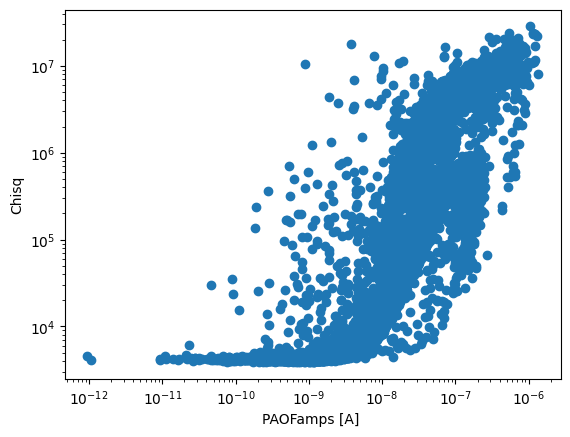

In [18]:
idx = 0
key = series[idx]
c = 'PA'
det = 'Z1'
mask = (EventCategory[idx] == 0) & (OFamps[key]['Z1'][c] > 0.)
x = OFamps[key]['Z1'][c][mask]
y = OFchiq[key]['Z1'][c][mask]

plt.figure()
plt.scatter(x.tolist(),y.tolist())
plt.yscale('log')
plt.xscale('log')
plt.xlabel('PAOFamps [A] ')
plt.ylabel('Chisq')
plt.show()

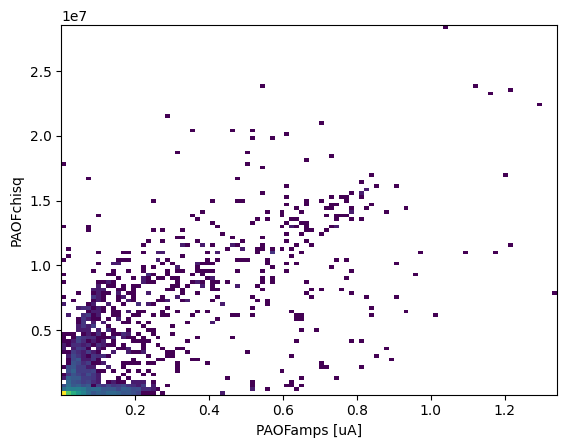

In [19]:
idx = 0
key = series[idx]
c = 'PA'
det = 'Z1'
mask = (EventCategory[idx] == 0) & (OFamps[key]['Z1'][c] > 0.)
x = OFamps[key]['Z1'][c][mask]
y = OFchiq[key]['Z1'][c][mask]

plt.figure()
#plt.hist2d(x*1e6,y,norm=mpl.colors.LogNorm(),bins=[100,100], range=[[0,3],[0,100]])
plt.hist2d(x*1e6,y,norm=mpl.colors.LogNorm(),bins=[100,100])
#plt.hist2d(events['0V']['PTOFchisq'][mask],events['0V']['PTOFamps'][mask],norm=mpl.colors.LogNorm(),bins=[100,1000], range=[[0,5],[3500,5e5]])

#x = events['0V']['PTOFchisq'][mask]
#
plt.xlabel('%sOFamps [uA]'%(c))
plt.ylabel('%sOFchisq'%(c))
plt.show()
#plt.yscale('log')
# plt.xscale('log')

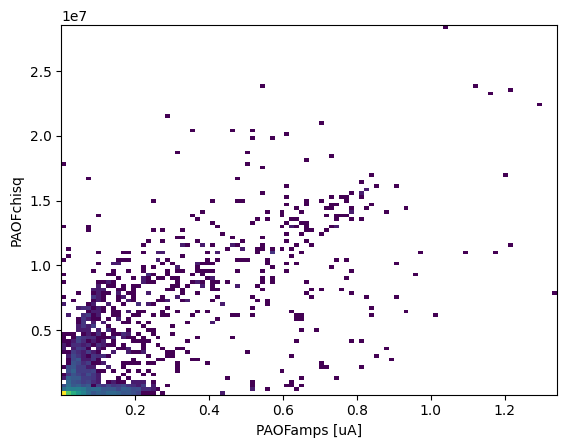

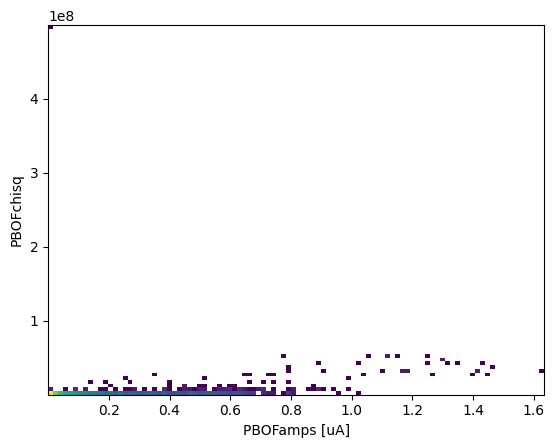

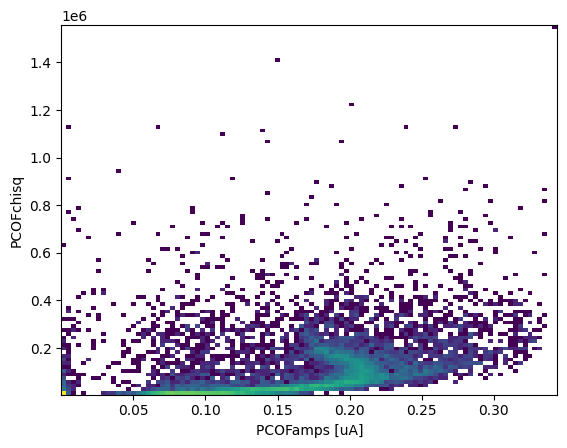

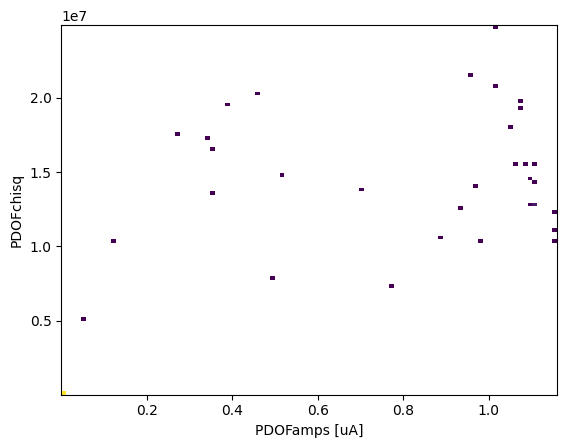

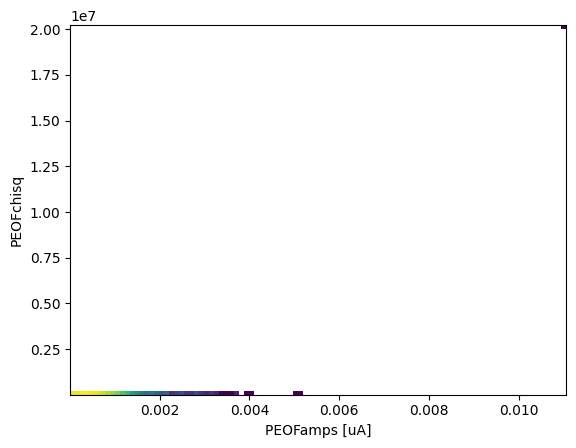

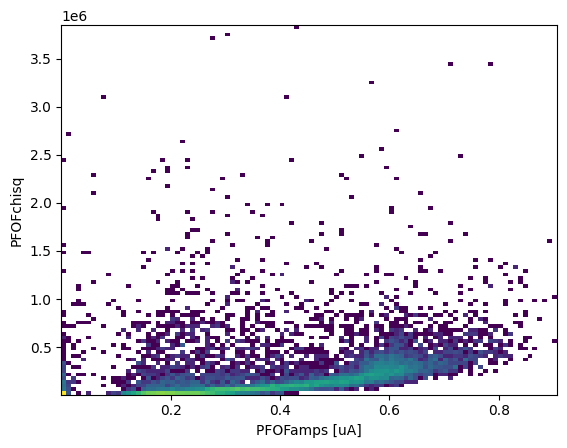

In [20]:
det = 'Z1'

for c in channels:
    if(c == 'PT'):
        continue
    mask = (EventCategory[idx] == 0) & (OFamps[key]['Z1'][c] > 0.)
    x = OFamps[key]['Z1'][c][mask]
    y = OFchiq[key]['Z1'][c][mask]

    plt.figure()
    #plt.hist2d(x*1e6,y,norm=mpl.colors.LogNorm(),bins=[100,100], range=[[0,3],[0,100]])
    plt.hist2d(x*1e6,y,norm=mpl.colors.LogNorm(),bins=[100,100])
    #plt.hist2d(events['0V']['PTOFchisq'][mask],events['0V']['PTOFamps'][mask],norm=mpl.colors.LogNorm(),bins=[100,1000], range=[[0,5],[3500,5e5]])

    #x = events['0V']['PTOFchisq'][mask]
    #
    plt.xlabel('%sOFamps [uA]'%(c))
    plt.ylabel('%sOFchisq'%(c))
    plt.show()

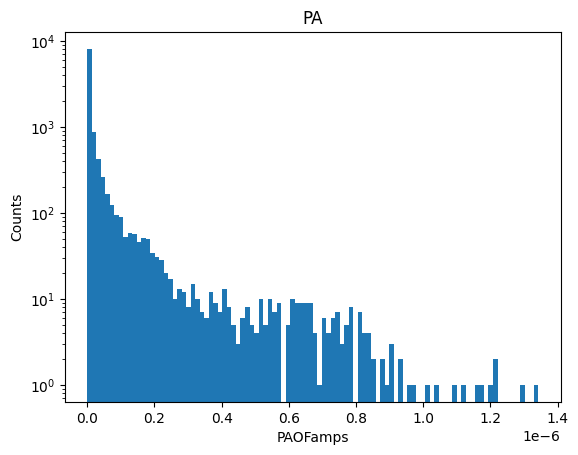

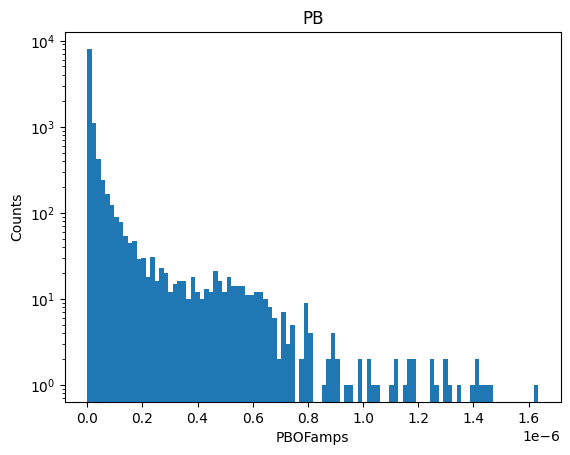

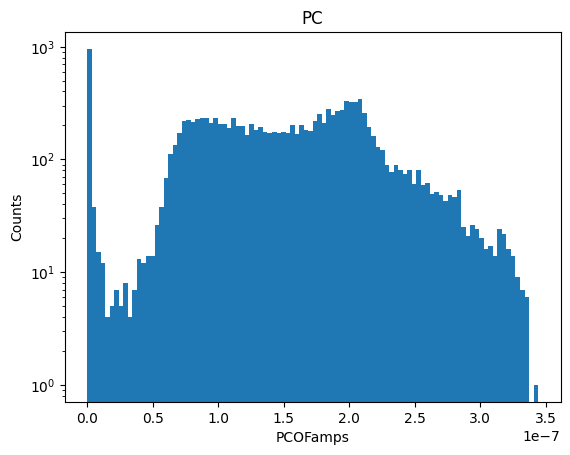

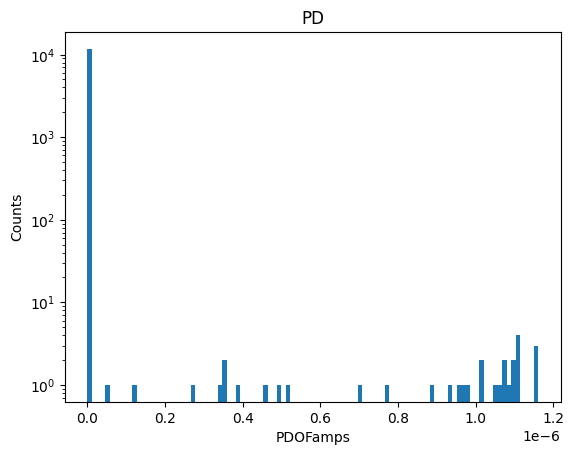

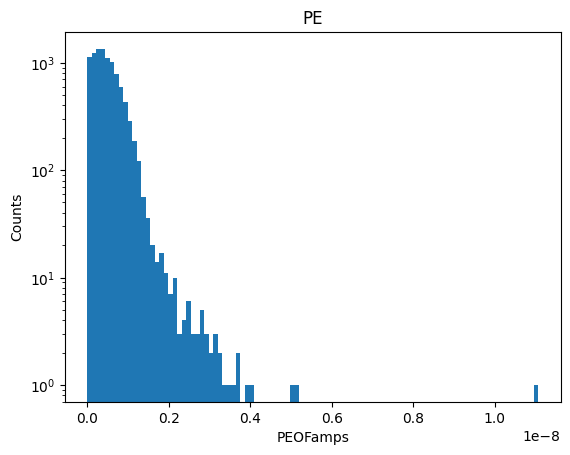

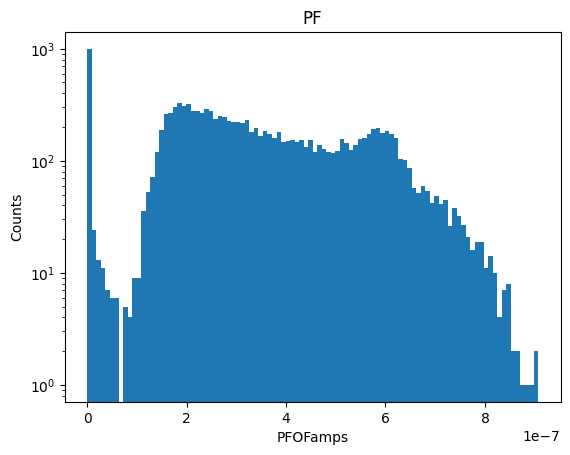

In [58]:
det = 'Z1'
idx = 0
key = series[idx]
for c in channels:
    if(c == 'PT'):
        continue
    mask = (EventCategory[idx] == 0) & (OFamps[key]['Z1'][c] > 0.)
    x = OFamps[key]['Z1'][c][mask]
    #y = OFchiq[key]['Z1'][c][mask]

    plt.figure()
    #plt.hist2d(x*1e6,y,norm=mpl.colors.LogNorm(),bins=[100,100], range=[[0,3],[0,100]])
    plt.hist(x,bins=100)
    #plt.hist2d(x*1e6,y,norm=mpl.colors.LogNorm(),bins=[100,100])
    #plt.hist2d(events['0V']['PTOFchisq'][mask],events['0V']['PTOFamps'][mask],norm=mpl.colors.LogNorm(),bins=[100,1000], range=[[0,5],[3500,5e5]])

    #x = events['0V']['PTOFchisq'][mask]
    #
    plt.xlabel('%sOFamps'%(c))
    plt.ylabel('Counts')
    plt.yscale('log')
    plt.title(c)
    plt.show()

In [46]:
def deg(angle):
    return angle*(np.pi/180)

det = 'Z1'
print('Calculating triangles......')
CDE_S1_X = {}
CDE_S1_Y = {}
CDE_S2_X = {}
CDE_S2_Y = {}
CDE_S1_X_corr = {}
CDE_S1_Y_corr = {}
CDE_S2_X_corr = {}
CDE_S2_Y_corr = {}

BDF_S1_X = {}
BDF_S1_Y = {}
BDF_S2_X = {}
BDF_S2_Y = {}
BDF_S1_X_corr = {}
BDF_S1_Y_corr = {}
BDF_S2_X_corr = {}
BDF_S2_Y_corr = {}

ADF_S1_X = {}
ADF_S1_Y = {}
ADF_S2_X = {}
ADF_S2_Y = {}
ADF_S1_X_corr = {}
ADF_S1_Y_corr = {}
ADF_S2_X_corr = {}
ADF_S2_Y_corr = {}

asym_par = {}
asym_par_corr = {}

#--------------- From my study ------------
# c1 = 0.75
# d1 = 0.85
# e1 = 0.9


# b1 = 0.8
# f1 = 0.65

# a1 = 0.85

# a1 = a1*1.4
# b1 = b1*1.4
# c1 = c1*1.4
# d1 = d1*1.4
# e1 = e1*1.4
# f1 = f1*1.4

# c2 = 0.85
# d2 = 1.2
# e2 = 1.1

# b2 = 1.2
# f2 = 0.9

# a2 = 1.3
#----------------------------------

#--------------- From Aditi ------------
### original ###
# a1 = 1.1849
# b1 = 0.9570
# c1 = 0.9115
# d1 = 1.0482
# e1 = 0.8659
# f1 = 0.7292

# a2 = 1.2351
# b2 = 1.0477
# c2 = 0.8518
# d2 = 1.2948
# e2 = 1.0222
# f2 = 0.8518
###############



a1 = 1.0
b1 = 1.0
c1 = 1.0
d1 = 1.0
e1 = 1.0
f1 = 1.0

a2 = 1.0
b2 = 1.0
c2 = 1.0
d2 = 1.0
e2 = 1.0
f2 = 1.0

#---------------------------------------
reweight = 1.0


for idx, key in enumerate(series):
    A1_def = OFamps[key][det]['PA']
    B1_def = OFamps[key][det]['PB']
    C1_def = OFamps[key][det]['PC']
    D1_def = OFamps[key][det]['PD']
    E1_def = OFamps[key][det]['PE']
    F1_def = OFamps[key][det]['PF']

    A2_def = 1.0
    B2_def = 1.0
    C2_def = 1.0
    D2_def = 1.0
    E2_def = 1.0
    F2_def = 1.0
    
    A1 = a1*A1_def
    B1 = b1*B1_def
    C1 = c1*C1_def
    D1 = d1*D1_def
    E1 = e1*E1_def
    F1 = f1*F1_def
    
    A2 = a2*A2_def
    B2 = b2*B2_def
    C2 = c2*C2_def
    D2 = d2*D2_def
    E2 = e2*E2_def
    F2 = f2*F2_def
    
    bdf_s1_x = (F1_def*np.cos(deg(0)) + B1_def*np.cos(deg(120)) + D1_def*np.cos(deg(240)))/(F1_def+B1_def+D1_def)
    bdf_s1_y = (F1_def*np.sin(deg(0)) + B1_def*np.sin(deg(120)) + D1_def*np.sin(deg(240)))/(F1_def+B1_def+D1_def)
    bdf_s2_x = (B2_def*np.cos(deg(0+60)) + F2_def*np.cos(deg(120+60)) + D2_def*np.cos(deg(240+60)))/(F2_def+B2_def+D2_def)
    bdf_s2_y = (B2_def*np.sin(deg(0+60)) + F2_def*np.sin(deg(120+60)) + D2_def*np.sin(deg(240+60)))/(F2_def+B2_def+D2_def)
    BDF_S1_X[key] = np.array(bdf_s1_x)
    BDF_S1_Y[key] = np.array(bdf_s1_y)
    BDF_S2_X[key] = np.array(bdf_s2_x)
    BDF_S2_Y[key] = np.array(bdf_s2_y)

    bdf_s1_x = (F1*np.cos(deg(0)) + B1*np.cos(deg(120)) + D1*np.cos(deg(240)))/(F1+B1+D1)
    bdf_s1_y = (F1*np.sin(deg(0)) + B1*np.sin(deg(120)) + D1*np.sin(deg(240)))/(F1+B1+D1)
    bdf_s2_x = (B2*np.cos(deg(0+60)) + F2*np.cos(deg(120+60)) + D2*np.cos(deg(240+60)))/(F2+B2+D2)
    bdf_s2_y = (B2*np.sin(deg(0+60)) + F2*np.sin(deg(120+60)) + D2*np.sin(deg(240+60)))/(F2+B2+D2)
    BDF_S1_X_corr[key] = np.array(bdf_s1_x)
    BDF_S1_Y_corr[key] = np.array(bdf_s1_y)
    BDF_S2_X_corr[key] = np.array(bdf_s2_x)
    BDF_S2_Y_corr[key] = np.array(bdf_s2_y)
    
    
    cde_s1_x = (E1_def*np.cos(deg(0)) + C1_def*np.cos(deg(120)) + D1_def*np.cos(deg(240)))/(E1_def+C1_def+D1_def)
    cde_s1_y = (E1_def*np.sin(deg(0)) + C1_def*np.sin(deg(120)) + D1_def*np.sin(deg(240)))/(E1_def+C1_def+D1_def)
    cde_s2_x = (C2_def*np.cos(deg(0+60)) + E2_def*np.cos(deg(120+60)) + D2_def*np.cos(deg(240+60)))/(E2_def+C2_def+D2_def)
    cde_s2_y = (C2_def*np.sin(deg(0+60)) + E2_def*np.sin(deg(120+60)) + D2_def*np.sin(deg(240+60)))/(E2_def+C2_def+D2_def)
    CDE_S1_X[key] = np.array(cde_s1_x)
    CDE_S1_Y[key] = np.array(cde_s1_y)
    CDE_S2_X[key] = np.array(cde_s2_x)
    CDE_S2_Y[key] = np.array(cde_s2_y)

    cde_s1_x = (E1*np.cos(deg(0)) + C1*np.cos(deg(120)) + D1*np.cos(deg(240)))/(E1+C1+D1)
    cde_s1_y = (E1*np.sin(deg(0)) + C1*np.sin(deg(120)) + D1*np.sin(deg(240)))/(E1+C1+D1)
    cde_s2_x = (C2*np.cos(deg(0+60)) + E2*np.cos(deg(120+60)) + D2*np.cos(deg(240+60)))/(E2+C2+D2)
    cde_s2_y = (C2*np.sin(deg(0+60)) + E2*np.sin(deg(120+60)) + D2*np.sin(deg(240+60)))/(E2+C2+D2)
    CDE_S1_X_corr[key] = np.array(cde_s1_x)
    CDE_S1_Y_corr[key] = np.array(cde_s1_y)
    CDE_S2_X_corr[key] = np.array(cde_s2_x)
    CDE_S2_Y_corr[key] = np.array(cde_s2_y)
    
    adf_s1_x = (F1_def*np.cos(deg(0)) + A1_def*np.cos(deg(120)) + D1_def*np.cos(deg(240)))/(F1_def+A1_def+D1_def)
    adf_s1_y = (F1_def*np.sin(deg(0)) + A1_def*np.sin(deg(120)) + D1_def*np.sin(deg(240)))/(F1_def+A1_def+D1_def)
    adf_s2_x = (A2_def*np.cos(deg(0+60)) + F2_def*np.cos(deg(120+60)) + D2_def*np.cos(deg(240+60)))/(F2_def+A2_def+D2_def)
    adf_s2_y = (A2_def*np.sin(deg(0+60)) + F2_def*np.sin(deg(120+60)) + D2_def*np.sin(deg(240+60)))/(F2_def+A2_def+D2_def)
    ADF_S1_X[key] = np.array(adf_s1_x)
    ADF_S1_Y[key] = np.array(adf_s1_y)
    ADF_S2_X[key] = np.array(adf_s2_x)
    ADF_S2_Y[key] = np.array(adf_s2_y)

    adf_s1_x = (F1*np.cos(deg(0)) + A1*np.cos(deg(120)) + D1*np.cos(deg(240)))/(F1+A1+D1)
    adf_s1_y = (F1*np.sin(deg(0)) + A1*np.sin(deg(120)) + D1*np.sin(deg(240)))/(F1+A1+D1)
    adf_s2_x = (A2*np.cos(deg(0+60)) + F2*np.cos(deg(120+60)) + D2*np.cos(deg(240+60)))/(F2+A2+D2)
    adf_s2_y = (A2*np.sin(deg(0+60)) + F2*np.sin(deg(120+60)) + D2*np.sin(deg(240+60)))/(F2+A2+D2)
    ADF_S1_X_corr[key] = np.array(adf_s1_x)
    ADF_S1_Y_corr[key] = np.array(adf_s1_y)
    ADF_S2_X_corr[key] = np.array(adf_s2_x)
    ADF_S2_Y_corr[key] = np.array(adf_s2_y)
    
    s1 = A1_def + B1_def + C1_def + D1_def + E1_def + F1_def
    s2 = A2_def + B2_def + C2_def + D2_def + E2_def + F2_def
    asym_par[key] = (s1 - s2)/(s1 + s2)
    s1 = A1 + B1 + C1 + D1 + E1 + F1
    s1 = s1*reweight
    s2 = A2 + B2 + C2 + D2 + E2 + F2
    
    asym_par_corr[key] = (s1 - s2)/(s1 + s2)
    
    print('%s done'%(key))

Calculating triangles......
07240205_1718 done
07240206_1832 done


In [ ]:
def compute_triangle(X,Y,low,high,chiq,detNum,chan):
    x = np.array([])
    y = np.array([])
    chan = 'PT'
    
    for idx, key in enumerate(series):
        #mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 25e-6) & (OFamps[key][chan] < 32e-6) & (OFchiq[key][chan] < 5e5)
        mask = (TriggerType[idx] == 1) & (TrigDet[idx] == detNum) & (OFamps[key][chan] > low) & (OFamps[key][chan] < high) & (OFchiq[key][chan] < 5e5)
        x = np.append(x,X[key][mask])
        y = np.append(y,Y[key][mask])
    return(x,y)

In [54]:
len(CDE_S1_X[key])

13189

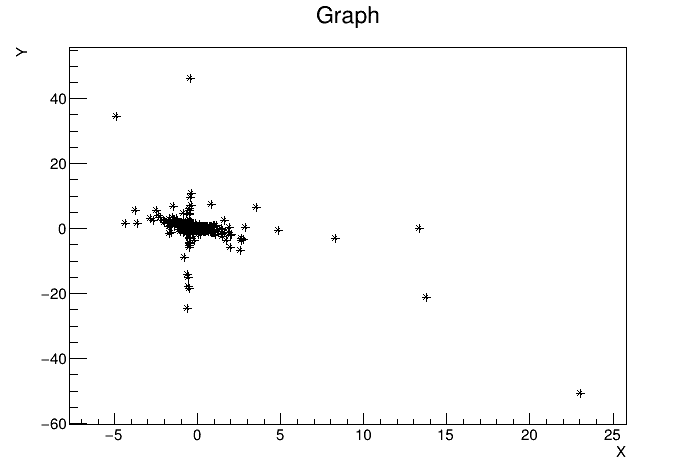

In [55]:
idx = 0
key = series[idx]
det = 'Z1'

mask = (EventCategory[idx] == 0) & (CDE_S1_X[key] > -10) #& (OFamps[key]['Z1']['PC'] < 0.1e-6) & (OFamps[key]['Z1']['PC'] > 0.)
x = CDE_S1_X[key][mask]
y = CDE_S1_Y[key][mask]

can = rt.TCanvas()
gr = rt.TGraph(len(x),x,y)
gr.SetMarkerStyle(rt.kFullDotMedium)
#gr.SetMarkerSize(2)
#gr.SetMarkerStyle(rt.kCircle)
gr.GetXaxis().SetTitle('X')
gr.GetYaxis().SetTitle('Y')
# gr.SetTitle('Around 1.3 keV line (S1) C-D-E')
# gr.GetYaxis().SetRangeUser(-0.5,0.5)
# gr.GetXaxis().SetRangeUser(-0.5,1.0)

gr.Draw('AP*')
can.Draw()

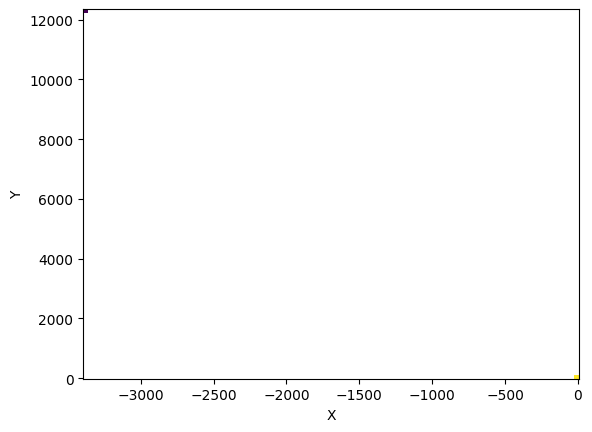

In [48]:
idx = 0
key = series[idx]
det = 'Z1'

mask = (EventCategory[idx] == 0) & (OFamps[key]['Z1']['PC'] < 0.1e-6) & (OFamps[key]['Z1']['PC'] > 0.)
x = CDE_S1_X[key][mask]
y = CDE_S1_Y[key][mask]

plt.figure()
#plt.hist2d(x*1e6,y,norm=mpl.colors.LogNorm(),bins=[100,100], range=[[0,3],[0,100]])
plt.hist2d(x,y,norm=mpl.colors.LogNorm(),bins=[100,100])
#plt.hist2d(events['0V']['PTOFchisq'][mask],events['0V']['PTOFamps'][mask],norm=mpl.colors.LogNorm(),bins=[100,1000], range=[[0,5],[3500,5e5]])

#x = events['0V']['PTOFchisq'][mask]
#
plt.xlabel('X')
plt.ylabel('Y')
plt.show()